# Ford GoBike Exploratory Analysis

### Description: Exploration into similarities, differences, and patterns between user types
 - Focus on duration, gender, age, user type, and month-to-month comparisons
 - Times, stations, neighborhoods, and other location data will be explored in Part II

## Import Requirements:

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load the Master Dataset

In [117]:
df = pd.read_csv('/Users/mattames/Desktop/ford_gobike/all_bikeshare_datasets/cleaned_datasets/master-dataset-v2.csv')

In [118]:
df.head()

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
0,1035,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,Subscriber,No,Male,1988
1,1673,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,Customer,No,Male,1987
2,3498,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,No,Female,1986
3,3129,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,No,Male,1981
4,1839,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,Subscriber,Yes,Female,1976


In [119]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197671 entries, 0 to 3197670
Data columns (total 16 columns):
bike_id                    3197671 non-null int64
duration_sec               3197671 non-null int64
start_time                 3197671 non-null object
end_time                   3197671 non-null object
start_station_id           3197671 non-null int64
start_station_name         3197671 non-null object
start_station_latitude     3197671 non-null float64
start_station_longitude    3197671 non-null float64
end_station_id             3197671 non-null int64
end_station_name           3197671 non-null object
end_station_latitude       3197671 non-null float64
end_station_longitude      3197671 non-null float64
user_type                  3197671 non-null object
bike_share_for_all_trip    3197671 non-null object
member_gender              3197671 non-null object
member_birth_year          3197671 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 390.3+ MB


In [120]:
# Re-convert datetime datatypes
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [121]:
# Confirm change
df.dtypes

bike_id                             int64
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
user_type                          object
bike_share_for_all_trip            object
member_gender                      object
member_birth_year                   int64
dtype: object

## Exploratory Analysis & Additional Cleaning

In [122]:
# Check statistics for numerical columns
df.describe()

,bike_id,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06,3.197671e+06
mean,2.709359e+03,7.734795e+02,1.229253e+02,3.776958e+01,-1.223534e+02,1.210837e+02,3.776950e+01,-1.223521e+02,1.983189e+03
std,1.716219e+03,1.971263e+03,1.037837e+02,1.015278e-01,1.357226e-01,1.036002e+02,1.336651e-01,3.128577e-01,1.043911e+01
min,1.000000e+01,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.878000e+03
25%,1.323000e+03,3.450000e+02,3.600000e+01,3.777106e+01,-1.224117e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.978000e+03
50%,2.561000e+03,5.430000e+02,9.000000e+01,3.778107e+01,-1.223974e+02,8.900000e+01,3.778127e+01,-1.223971e+02,1.986000e+03
75%,3.756000e+03,8.380000e+02,1.930000e+02,3.779581e+01,-1.222914e+02,1.890000e+02,3.779625e+01,-1.222914e+02,1.991000e+03
max,7.196000e+03,8.628100e+04,4.270000e+02,3.788022e+01,0.000000e+00,4.270000e+02,3.788022e+01,0.000000e+00,2.001000e+03


1. Max duration in seconds appears way too high, a 23 hour bike rental cannot be a legitimate rental (could be someone incorrectly returning the bike? If there's multiple of these trips from the same bikes, do we have broken bikes?). I will need to plot the distribution of ride durations and select a reasonable range to focus on. Take care of this during my univariate exploration.
2. Min birth year of 1983 would make the rider 141 years old. This must be an error and a reasonable age range will need to be selected and focused on. Take care of this during my univariate exploration.
3. Station latitudes of 0 would place the stations on the equator. The Bay area coordinates should all be between 37 and 38 for latitude and -121 and -123 for longitude. Clean this right away.

### Issue 1: 

#### Define
Correct the dirty station location data. The only station coordinates outside the expected range are for the test station data entry, so there is no filling or adjusting of values to be done. Just use .drop() to drop all rows where start_station_name or end_station_name is "SF Test Station".

#### Code

In [123]:
# Start station latitude test lower limit
df.query('start_station_latitude < 37')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
265936,1161,175,2019-04-24 16:56:54.516,2019-04-24 16:59:50.429,420,SF Test Station,0.0,0.0,81,Berry St at 4th St,37.77588,-122.39317,Subscriber,No,Male,1983


In [124]:
# Start station latitude test upper limit
df.query('start_station_latitude > 38')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [125]:
# Start station longitude test lower limit
df.query('start_station_longitude > -121')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
265936,1161,175,2019-04-24 16:56:54.516,2019-04-24 16:59:50.429,420,SF Test Station,0.0,0.0,81,Berry St at 4th St,37.77588,-122.39317,Subscriber,No,Male,1983


In [126]:
# Start station longitude test lower limit
df.query('start_station_longitude < -123')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [127]:
# End station latitude test lower limit
df.query('end_station_latitude < 37')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
228312,1612,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,50,2nd St at Townsend St,37.780526,-122.390288,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1995
229051,3507,1964,2019-04-30 17:31:19.646,2019-04-30 18:04:04.518,98,Valencia St at 16th St,37.765052,-122.421866,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981
229203,1142,546,2019-04-30 17:45:38.452,2019-04-30 17:54:45.258,370,Jones St at Post St,37.787327,-122.413278,420,SF Test Station,0.0,0.0,Subscriber,Yes,Female,1991
229277,3500,630,2019-04-30 17:39:33.507,2019-04-30 17:50:04.314,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1991
229713,1181,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,11,Davis St at Jackson St,37.797280,-122.398436,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1995
229792,2535,1233,2019-04-30 16:58:41.209,2019-04-30 17:19:14.689,81,Berry St at 4th St,37.775880,-122.393170,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1970
229823,462,1306,2019-04-30 16:55:35.924,2019-04-30 17:17:22.162,80,Townsend St at 5th St,37.775235,-122.397437,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1992
230101,1880,764,2019-04-30 16:44:12.351,2019-04-30 16:56:56.539,16,Steuart St at Market St,37.794130,-122.394430,420,SF Test Station,0.0,0.0,Customer,No,Male,1976
241904,150,1491,2019-04-28 18:40:41.288,2019-04-28 19:05:33.063,377,Fell St at Stanyan St,37.771917,-122.453704,420,SF Test Station,0.0,0.0,Customer,No,Male,1981
241956,311,680,2019-04-28 18:40:08.324,2019-04-28 18:51:28.357,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981


In [128]:
# End station latitude test upper limit
df.query('end_station_latitude > 38')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [129]:
# End station longitude test lower limit
df.query('end_station_longitude > -121')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year
228312,1612,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,50,2nd St at Townsend St,37.780526,-122.390288,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1995
229051,3507,1964,2019-04-30 17:31:19.646,2019-04-30 18:04:04.518,98,Valencia St at 16th St,37.765052,-122.421866,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981
229203,1142,546,2019-04-30 17:45:38.452,2019-04-30 17:54:45.258,370,Jones St at Post St,37.787327,-122.413278,420,SF Test Station,0.0,0.0,Subscriber,Yes,Female,1991
229277,3500,630,2019-04-30 17:39:33.507,2019-04-30 17:50:04.314,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1991
229713,1181,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,11,Davis St at Jackson St,37.797280,-122.398436,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1995
229792,2535,1233,2019-04-30 16:58:41.209,2019-04-30 17:19:14.689,81,Berry St at 4th St,37.775880,-122.393170,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1970
229823,462,1306,2019-04-30 16:55:35.924,2019-04-30 17:17:22.162,80,Townsend St at 5th St,37.775235,-122.397437,420,SF Test Station,0.0,0.0,Subscriber,No,Male,1992
230101,1880,764,2019-04-30 16:44:12.351,2019-04-30 16:56:56.539,16,Steuart St at Market St,37.794130,-122.394430,420,SF Test Station,0.0,0.0,Customer,No,Male,1976
241904,150,1491,2019-04-28 18:40:41.288,2019-04-28 19:05:33.063,377,Fell St at Stanyan St,37.771917,-122.453704,420,SF Test Station,0.0,0.0,Customer,No,Male,1981
241956,311,680,2019-04-28 18:40:08.324,2019-04-28 18:51:28.357,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,420,SF Test Station,0.0,0.0,Subscriber,No,Female,1981


In [130]:
# End station longitude test lower limit
df.query('end_station_longitude < -123')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [131]:
# Drop all rows where start station name is "SF Test Station"
df = df.query('start_station_name != "SF Test Station"')

In [132]:
# Drop all rows where end station name is "SF Test Station"
df = df.query('end_station_name != "SF Test Station"')

#### Test

In [133]:
# Confirm SF Test Station no longer exists as a start station name
df.query('start_station_name == "SF Test Station"')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [134]:
# Confirm SF Test Station no longer exists as an end station name
df.query('end_station_name == "SF Test Station"')

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year


In [135]:
# Confirm the length of df
len(df)

3197652

In [136]:
df.to_csv('/Users/mattames/Desktop/ford_gobike/all_bikeshare_datasets/cleaned_datasets/master-dataset-v3.csv', index=False)

## Univariate Exploration

### Trip Duration

#### Histogram of durations

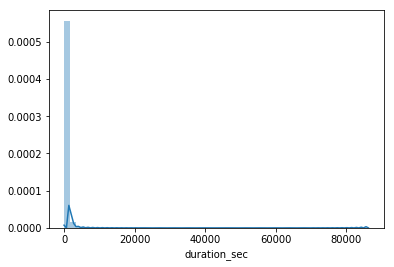

In [137]:
sns.distplot(df["duration_sec"]);

#### Define

Clearly the data is massively skewed towards smaller trip durations and these outlying trip durations prevent us from understanding the bulk of the data. Also, viewing in terms of seconds is not intuitive, feature engineer a duration_min column and plot accordingly.

#### Code

In [138]:
df['duration_min'] = df['duration_sec']/60

#### Test

In [139]:
# Confirm accurate calculation
df.head(1)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min
0,1035,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.40257,Subscriber,No,Male,1988,9.966667


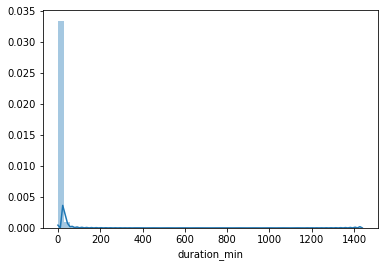

In [140]:
# Re-plot histogram, it should look the same as above but with different x-axis units
sns.distplot(df["duration_min"]);

Considering that bike rentals for customers are priced according to a 30 min limit and subscribers at a 45 min limit, we will focus on a 2 hour trip duration max. This is a reasonable range based on the pricing system and the bulk of trip durations from the above chart.

#### Histogram of durations with focus on bulk of data

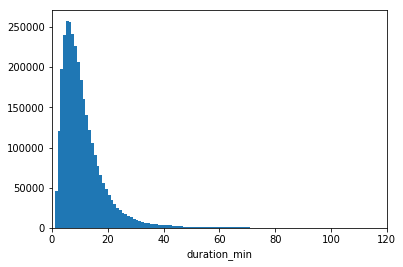

In [141]:
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((0,120));

#### Insight:
 - The vast majority of bike rides fall between 2 and 20 minutes. Does a 2 minute ride make sense? We should include the 1-3 minute bike rides for now because we don't know the distribution of stations yet. It is possible someone rented a bike and rode it to the next nearest station (for example, a quick 3 block trip down a large hill would be much more convenient than walking it), we will keep these trips in our analysis until we have addition information and can confidently exclude them.
 - The peak of our distribution is around 6 minutes. Due to this being much lower than anticipated, I am included to believe 2-4 minute trips are certainly possible and should not be removed.

### Birth Year

#### Histogram of birth years

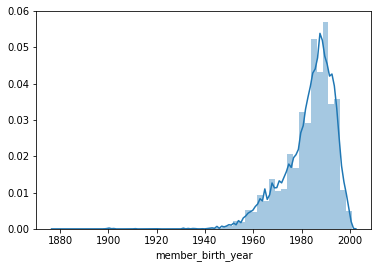

In [142]:
sns.distplot(df["member_birth_year"]);

#### Define
Filter out impossible and unreasonable birth years.

 - The oldest living Californian is 112, so it is impossible for someone to be born before 1907. Additionally, we will drop riders above the age of 85 from our dataset for the sake of focusing on the most important trips and riders. It is possible that someone 85+ is using the bikes, but highly unlikely. Therefore, this extremely small portion of the data can be assumed unreliable. It is possible that these users are over 85, but also possible that these were input errors.

#### Code

In [143]:
df = df.query('member_birth_year > 1906')

#### Test

In [144]:
df.member_birth_year.describe()

count    3.195979e+06
mean     1.983232e+03
std      1.026731e+01
min      1.907000e+03
25%      1.978000e+03
50%      1.986000e+03
75%      1.991000e+03
max      2.001000e+03
Name: member_birth_year, dtype: float64

In [145]:
len(df)

3195979

#### Histogram of birth years with filtering

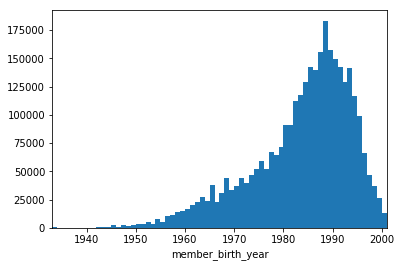

In [146]:
# re-plot birth year distribution after making adjustments
bin_edges = np.arange(0, df['member_birth_year'].max()+1, 1)
sns.distplot(df['member_birth_year'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((1933,2001));

#### Define
Plotting by birth year doesn't feel quite right, it would be more intuitive to plot by age so that it is more clearly shown that age increases from left to right. This will prevent potential misinterpretations by audiences.

#### Code

In [147]:
df['age'] = 2019-df['member_birth_year']

#### Test

In [148]:
# Confirm accurate calculation
df.head(1)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min,age
0,1035,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.40257,Subscriber,No,Male,1988,9.966667,31


#### Histogram of ages with filtering

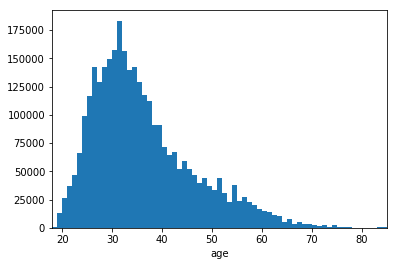

In [149]:
# Re-plot birth year distribution using age variable
bin_edges = np.arange(0, df['age'].max()+1, 1)
sns.distplot(df['age'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((18,85));

#### Insight:
 - Users between the ages of 25 and 45 represent the bulk of trips
 - Peaks in the early 30s
 - Despite a general downward trend after the early 30s, there appears to be a slight resurgence in trip count around the mid 50s. This is worth a closer look.

### Gender

#### Count of trips by gender

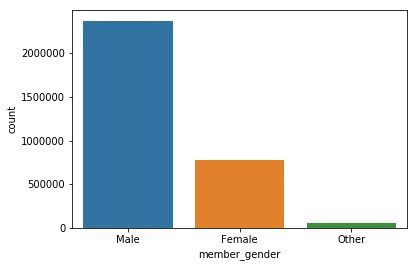

In [150]:
sns.countplot(data = df, x = 'member_gender');

In [151]:
# Proportion of trips by males
len(df.query('member_gender == "Male"'))/len(df)

0.7419125720162743

In [152]:
# Proportion of trips by females
len(df.query('member_gender == "Female"'))/len(df)

0.2416592849953019

#### Insight:
 - 74% of all *trips* are male users, remember this data is the number of trips, not the number of customers. We cannot discover the proportions of customers or subscribers because we do not have rider IDs to track individual riders separate from trips.
 - According to the US Censuc Bureau SF's gender makeup is 49% female and 51% male. This is very different from our above statistic, so do the gender proportions of our users fit the US Census Bureau's statistics but our male rides use the bikes at a much higher rate? Or do our gender proportions by trip accurately represent out users and therefore women are much less likely to sign up for bike share to begin with? We cannot answer these questions with this dataset, however it is important to take note of this.

### Month of Year

#### Define
Feature engineer a new column for month

#### Code

In [153]:
df['month_of_year'] = df['start_time'].dt.month

#### Test

In [154]:
df.sample(5)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min,age,month_of_year
2778461,869,364,2018-10-03 18:40:31.627,2018-10-03 18:46:35.940,160,West Oakland BART Station,37.805318,-122.294837,218,DeFremery Park,37.812331,-122.285171,Subscriber,No,Male,1981,6.066667,38,10
1524670,247,287,2018-05-29 16:37:25.374,2018-05-29 16:42:13.229,16,Steuart St at Market St,37.794130,-122.394430,28,The Embarcadero at Bryant St,37.787168,-122.388098,Subscriber,No,Male,1965,4.783333,54,5
2207559,2665,555,2019-01-09 08:19:53.937,2019-01-09 08:29:09.476,16,Steuart St at Market St,37.794130,-122.394430,50,2nd St at Townsend St,37.780526,-122.390288,Subscriber,No,Male,1970,9.250000,49,1
1254959,3988,618,2018-06-02 16:45:56.100,2018-06-02 16:56:14.846,336,Potrero Ave and Mariposa St,37.763281,-122.407377,119,18th St at Noe St,37.761047,-122.432642,Subscriber,No,Male,1971,10.300000,48,6
1389081,4608,1038,2019-03-16 18:41:12.642,2019-03-16 18:58:31.199,73,Pierce St at Haight St,37.771793,-122.433708,13,Commercial St at Montgomery St,37.794231,-122.402923,Subscriber,No,Female,1978,17.300000,41,3


#### Count of trips by month of the year

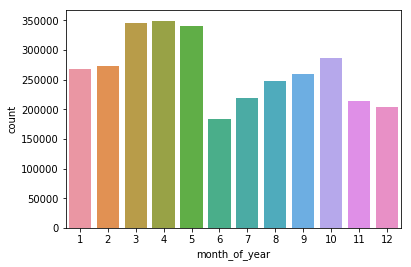

In [155]:
sns.countplot(data = df, x = 'month_of_year');

#### Insight:
 - This is not what I expected to find, the most popular months for rides are some of the coldest months of the year. There aren't large temperature swings between Summer and Winter in SF, however I would not expect 1) such a large difference between seasons, and 2) despite temperatures being similar it is technically a bit warmer and nicer out during those summer months, so shouldn't they be at least a little bit more popular in terms of number of rides? Instead, June, July and August are the 3 of the 5 least popular months.

**What happened here? Check the company website, and check the news for any major changes that took place. Additionally, we collected data for half of 2017, all of 2018, and half of 2019. 2 full years were collected in total, however if data from the first half of each year comes from 2018 and 2019, while the data for the second half of each year from 2017 and 2018, any changes in product offering could and user counts could heavily skew this plot.**

 - E-bikes were offered starting in April 2018, so I would expect a spike to begin after the e-bikes are released and remain relatively high over the summer due to the existence of e-bikes paired with better weather. However, this plot shows the beginning of the spike in March, which does not fit my above timeline. This could be skewed because in 2017 SF bikeshare was less popular and in 2019 much more popular. As a result, there was technically data collected twice for all months of the year but the existence of new subscription options, e-bikes, and increasing popularity would cause the months who's second set of data comes from 2019 (Jan-May) to skew our data towards those months. So this plot shows ridership being skewed towards those months, when in reality ridership is heavily skewed towards year, aka 2019.

Let's plot the above data again, but separate it into separate years. This should help us to still understand seasonal trends despite the spike in ridership due to e-bikes and popularity.

Let's remove 2017 and 2019 data to focus on a single, entire year of data collection. We should look for general seasonality trends, while being aware of the new e-bikes being offered starting in April of 2018.

#### Code

In [156]:
# Create new column for year
df['year'] = df['start_time'].dt.year

#### Test

In [157]:
# Confirm accuracy
df.sample(5)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_min,age,month_of_year,year
1836899,2116,651,2018-01-22 06:53:21.113,2018-01-22 07:04:12.709,24,Spear St at Folsom St,37.789677,-122.390428,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,Subscriber,No,Male,1990,10.850000,29,1,2018
2158630,4940,310,2019-01-18 10:43:05.744,2019-01-18 10:48:15.914,112,Harrison St at 17th St,37.763847,-122.413004,144,Precita Park,37.747300,-122.411403,Subscriber,No,Male,1993,5.166667,26,1,2019
3109561,5194,202,2019-02-16 10:18:17.612,2019-02-16 10:21:40.386,200,2nd Ave at E 18th St,37.800214,-122.253810,197,El Embarcadero at Grand Ave,37.808848,-122.249680,Subscriber,Yes,Male,1979,3.366667,40,2,2019
1509207,123,2017,2018-05-31 20:12:37.581,2018-05-31 20:46:14.763,301,Willow St at Vine St,37.318450,-121.883172,301,Willow St at Vine St,37.318450,-121.883172,Customer,No,Male,1983,33.616667,36,5,2018
1564434,388,785,2018-05-21 17:18:32.569,2018-05-21 17:31:37.607,350,8th St at Brannan St,37.771431,-122.405787,58,Market St at 10th St,37.776619,-122.417385,Subscriber,No,Female,1997,13.083333,22,5,2018


#### Define
Create 3 separate DataFrames using .query(), don't use groupby to plot this because the separate DataFrames may be helful in the future

#### Code

In [158]:
# Copy df 3 times, one for each year
df_2017 = df.copy()
df_2018 = df.copy()
df_2019 = df.copy()

In [159]:
# Query to keep only records pertaining to each year
df_2017 = df_2017.query('year == 2017')
df_2018 = df_2018.query('year == 2018')
df_2019 = df_2019.query('year == 2019')

#### Test

In [162]:
# Confirm success
print(df_2017.year.value_counts())
print(df_2018.year.value_counts())
print(df_2019.year.value_counts())
print(len(df))

2017    452794
Name: year, dtype: int64
2018    1740680
Name: year, dtype: int64
2019    1002505
Name: year, dtype: int64
3195979


#### 2017 count of trips by month of the year

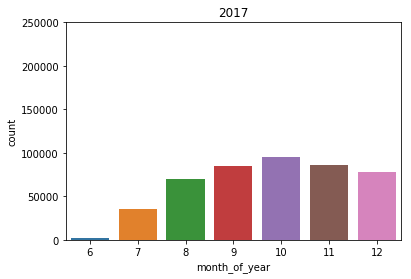

In [175]:
sns.countplot(data = df_2017, x = 'month_of_year');
plt.title('2017')
plt.ylim(0, 250000);

#### Insight:
 - We see a slight seasonal trend from Oct to Dec, however this is not a reliable plot to gather insights as it includes the very first years of the program. The Ford GoBike program was launched in Jun 2017, therefore what wee see here is simply customers learning about the service and signing up to join.

#### 2018 count of trips by month of the year

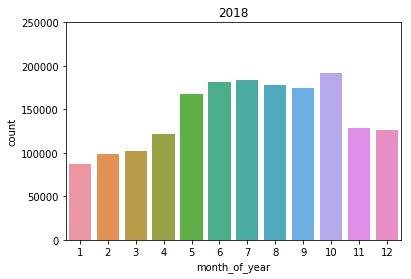

In [176]:
sns.countplot(data = df_2018, x = 'month_of_year');
plt.title('2018')
plt.ylim(0, 250000);

#### Insight:

If we break down this plot using what we know from the above analysis regarding the initial plot, we can see multiple insights.

 - E-bikes were released in Apr 2018. We can't directly determine the amount of increase in rides from seasonality vs. e-bike availability from Apr to May, however I believe that the relatively small decrease from Oct to Nov shows us the impact of e-bikes on number of rides. This is because I would expect a much larger decrease between these months due to seasonal changes than what occured.

 - Despite the apparent spike in rides due to e-bikes (as well as a transition from Winter to Spring), we still see an expected seasonal trend. From Nov-Mar SF has very similary weather and if seasonality didn't play a role in the total number of rides, we would not see rides drop heavily as the weather begins to cool down in Noveber.

#### 2019 count of trips by month of the year

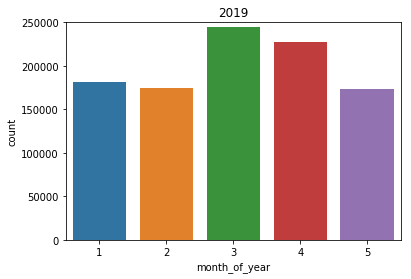

In [177]:
sns.countplot(data = df_2019, x = 'month_of_year');
plt.title('2019')
plt.ylim(0, 250000);

#### Insight:

Why is there such a large decrease in ridership from Apr to May? There should be an increase due to seasonality like what we saw in 2018.

 - In Apr 2019, Ford GoBike was forced to take all e-bikes off the streets due to safety issues. Riders were frequently flipping over off of their bikes and getting injured when attempting to break. This explains the drop in total rides from Apr to May.

### User Type

2 types:
 - Subscribers: members paying a monthly or annual fee
 - Customers: single-ride users

#### Count of trips by user type

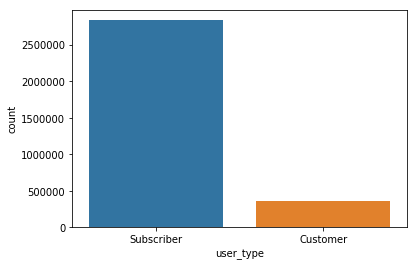

In [180]:
sns.countplot(data = df, x = 'user_type');

In [192]:
# Proportion of trips by subscribers
len(df.query('user_type == "Subscriber"'))/len(df)

0.8866341111753238

In [193]:
# Proportion of trips by customers
len(df.query('user_type == "Customer"'))/len(df)

0.11336588882467626

#### Insight:
 - Subscribers make up the vast majority of rides, as expected (over 88% to be exact)

## Save progress to csv file

#### Save final version of the master dataset

In [194]:
df.to_csv('/Users/mattames/Desktop/ford_gobike/all_bikeshare_datasets/cleaned_datasets/master-dataset-v4.csv', index=False)

#### Save the filtered version of the master dataset separately, apply the filters decided upon from the above insights
 - Duration: Drop all rows with duration over 120 min
 - Age: Drop all rows with age greater than 85

In [196]:
# Copy master dataset
df_filtered = df.copy()

In [206]:
# Filter for duration
df_filtered = df_filtered.query('duration_min < 120.01')

In [209]:
# Confirm duration filter
df_filtered.duration_min.describe()

count    3.181657e+06
mean     1.132922e+01
std      9.547962e+00
min      1.016667e+00
25%      5.733333e+00
50%      9.016667e+00
75%      1.386667e+01
max      1.200000e+02
Name: duration_min, dtype: float64

In [211]:
# Filter for age
df_filtered = df_filtered.query('age < 86')

In [212]:
# Confirm filter
df_filtered.age.max()

85

In [214]:
# Save to csv file
df_filtered.to_csv('/Users/mattames/Desktop/ford_gobike/all_bikeshare_datasets/cleaned_datasets/filtered-dataset-v1.csv', index=False)

### Average trip duration by user type

There is clearly a much larger number of of trips from subscribers than customers. What are the average trip durations of each of these 2 user types? If there is a much larger count of trips, does this mean there are more frequent short trips or simply the same durations for trips as customers but more trips in general?

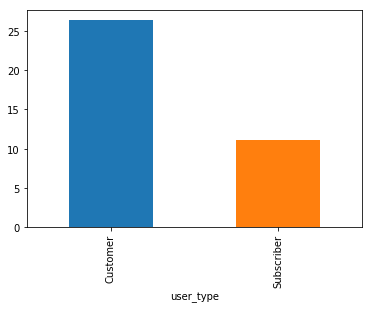

In [37]:
df.groupby("user_type")['duration_min'].mean().plot(kind='bar');

Customers appear to have a much higher average trip duration than subscribers.

My initial thoughts after seeing the above 2 plots are that subscribers use Ford GoBike for practical, consistent use, such a daily commutes, while customers are using bikes for leisurely activity and to explore the city (maybe visitors from out of town).

Let's see if the distributions of ride durations for subscribers and customers support this.

Later in the analysis, we will also look into day of the week. I would expect leisurely rides F-Su and practical rides M-Th.

#### Define
Create subsets of the master dataset to help with subscriber and customer specific analysis.

#### Code

In [38]:
df_subscriber = df.query('user_type == "Subscriber"')
df_customer = df.query('user_type == "Customer"')

#### Test

In [39]:
# Confirm subscriber df is proper length, over 2500000
len(df_subscriber)

2833664

In [40]:
# Confirm customer df is proper length, over 350000
len(df_customer)

362315

### Subscriber durations

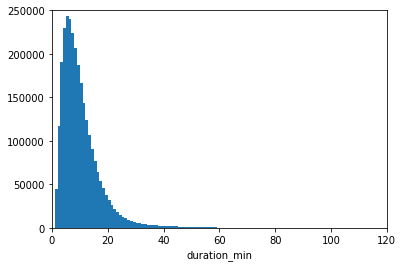

In [41]:
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_subscriber['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((0,120));
plt.ylim((0,250000));

### Customer durations

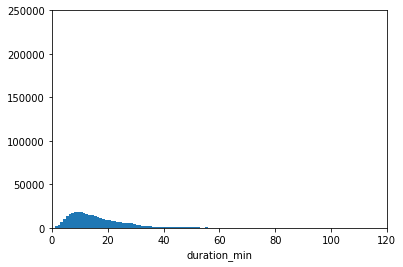

In [42]:
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_customer['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim((0,120));
plt.ylim((0,250000));

### Plot these next to each other to better compare

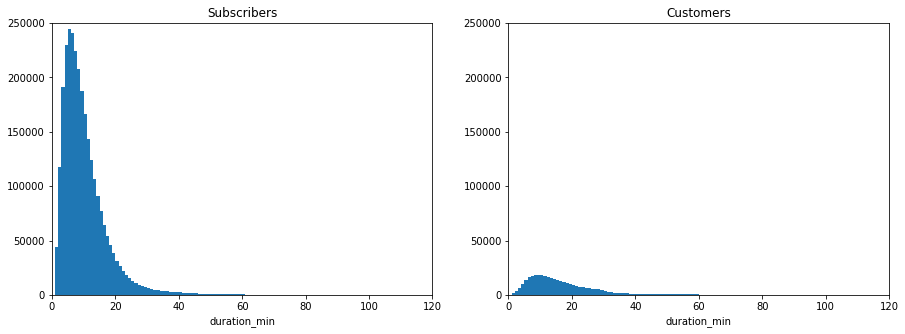

In [43]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# Subscriber plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_subscriber['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Subscribers')
plt.xlim((0,120));
plt.ylim((0,250000));

# Customer plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_customer['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Customers')
plt.xlim((0,120));
plt.ylim((0,250000));

We can see that the two user types have relatively similar skews (skewed towards smaller values) and the more extreme peak for Subscribers could explain why their average is shorter, however this alone doesn't explain such a large difference. There also appear to be a much slower decrease in count for Customers as time increases. This could also explain the difference in average trip. It seems as though the height to width ratio of the distributions could mean the customer distribution has a much longer tail with a higher percentage of trips on the longer end. What if we drill down to analyze the tails of the distributions? I want to check the distributions for durations 50 min or longer.

### Zoom-in on tail of each distribution

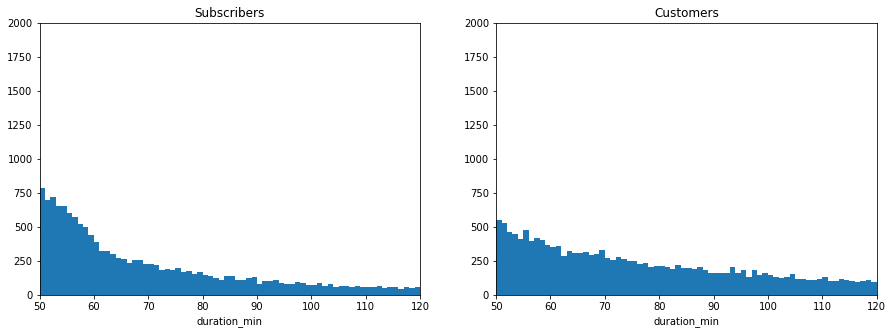

In [44]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# Subscriber plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_subscriber['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Subscribers')
plt.xlim((50,120));
plt.ylim((0,2000));

# Customer plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['duration_min'].max()+1, 1)
sns.distplot(df_customer['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Customers')
plt.xlim((50,120));
plt.ylim((0,2000));

The above plot makes it clear that the distribution of customer trip durations has a much longer and more gradual tail. This, paired with the higher peak for Subscribers and explains the large difference in average durations between Subscribers and Customers. The values shown in this plot also further support my claim that single-use customers are using the service for long distance city exploration, or are simply traveling at lower speeds due to the leisurely pace that someone would explore the city at.

Now that we have looked into trip duration by user type, it is now time to look into the relationship between age and user type.

### Comparing age by user type

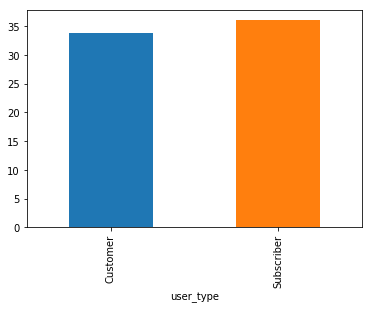

In [45]:
df.groupby("user_type")['age'].mean().plot(kind='bar');

We can see that subscribers are a bit older on average than customers, however this appears to be a very small difference. No more than 3 years.

Let's take a look at the distributions of ages for each user type to see if we can learn more.

### Distribution of ages by user type

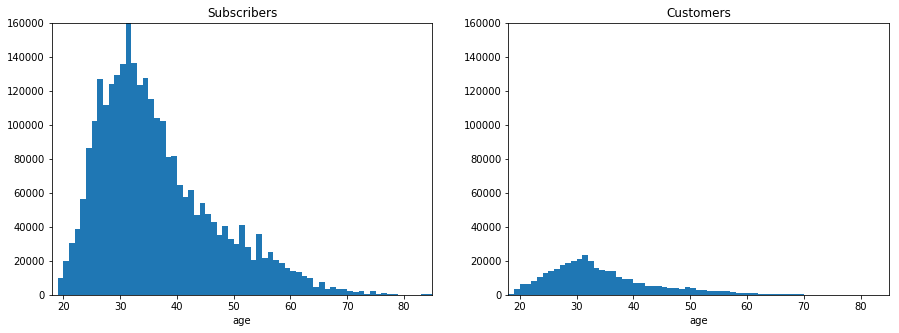

In [46]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# Subscriber plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['age'].max()+1, 1)
sns.distplot(df_subscriber['age'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Subscribers')
plt.xlim((18,85));
plt.ylim((0,160000));

# Customer plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['age'].max()+1, 1)
sns.distplot(df_customer['age'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.title('Customers')
plt.xlim((18,85));
plt.ylim((0,160000));

The above shows us that both customers and subscribers have very similar distributions with the majoirty around age 30 and customers have a very slight resurgence of rides for users around 50 years old.

### What is the total number of trips by month of the year for each user type during 2018?

#### Define
First, add month and year columns to the subscriber and customer datasets. Then remove all non-2018 rows.

#### Test

In [56]:
# Add month column
df_subscriber['month_of_year'] = df['start_time'].dt.month
df_customer['month_of_year'] = df['start_time'].dt.month

/Users/mattames/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mattames/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
# Add year column
df_subscriber['year'] = df_subscriber['start_time'].dt.year
df_customer['year'] = df_customer['start_time'].dt.year

/Users/mattames/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mattames/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
# Select only 2018 data
df_subscriber_2018 = df_subscriber.query('year == 2018')
df_customer_2018 = df_customer.query('year == 2018')

In [59]:
len(df_subscriber_2018)

1541624

In [60]:
len(df_customer_2018)

199056

### Number of trips by month of the year for each user type in 2018

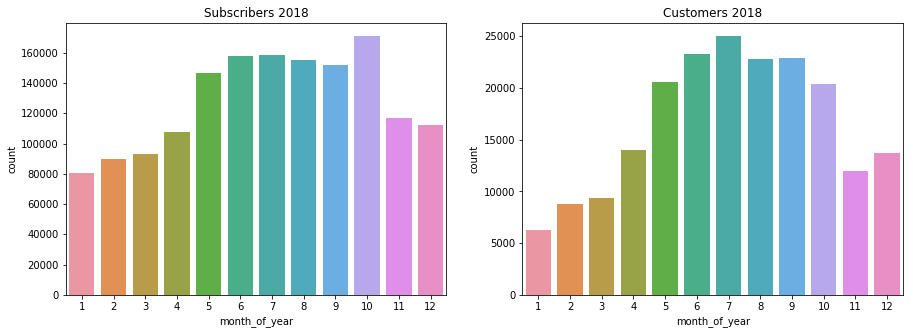

In [62]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# Subscriber plot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sns.countplot(data = df_subscriber_2018, x ='month_of_year');
plt.title('Subscribers 2018');

# Customer plot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sns.countplot(data = df_customer_2018, x ='month_of_year');
plt.title('Customers 2018');

As expected, I would think rides fluctuate the most due to weather conditions.

The plot on the left for subscribers shows that there are indeed more rides during the fair and warm weather months, however the percentage decrease from summer to winter is much less, which could be an illustration of my belief that subscribers use the bikes for practicality.

When looking at all customers all together regardless of subscription type, I attributed the smaller percent decrease from summer to winter versus the larger percent increase from winter to summer to the e-bikes. However when we separate the ...

The plot on the right shows that there are also more rides in the summer, but a larger percent decrease in the winter. This not only lines up with warmer weather in the summer when people are more likely to take leisurely rides, but it also supports the belief that many single-use customers are visitors from out of town because the most popular months for travel in the US are indeed the summer months.

Additionally, the trend for total trip counts regardless of user type more accurately reflect the subscribers trend because of how many more subscribers there are (note the axis labels, subscribers y-axis extends to over 160000 while the customers y-axis extends to only 25000).

# BECAUSE WE ALREADY KNOW THAT SUBSCRIBERS HAVE A TON MORE RIDES THAN CUSTOMERS AND WE WANT TO KNOW THE TRENDS WITHIN EACH GROUP, PLOT THIS DATA BASED ON PERCENT OF TOTAL. THIS WILL PROVIDE A MORE CLEAR IDEA OF HOW EACH GROUPS RIDE HABITS CHANGE OVER THE COURSE OF A YEAR. USING TOTALS LIKE I DID ABOVE PLACES THE PLOTS ON VERY DIFFERENT Y-AXIS LIMITS WHICH COULD LEAVE TO ME REACHING A FALSE CONCLUSION.

## Save all datasets so the final presentation can be completed in a separate Jupyter Notebook

In [ ]:
df.to_csv('df.csv', index=False)
df_subscriber.to_csv('df_subscriber.csv', index=False)
df_customer.to_csv('df_customer.csv', index=False)
df_2018.to_csv('df_2018.csv', index=False)
df_subscriber_2018.to_csv('df_subscriber_2018.csv', index=False)
df_customer_2018.to_csv('df_customer_2018.csv', index=False)